# Import Modules

In [5]:
import pandas as pd
import numpy as np
from tqdm.notebook import tqdm
import tensorflow as tf
from tensorflow.keras.preprocessing.image import img_to_array, load_img
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# Unzip the train data

In [6]:
!unzip /content/Train_UQcUa52.zip

Streaming output truncated to the last 5000 lines.
 extracting: Images/train/55.png     
 extracting: Images/train/550.png    
 extracting: Images/train/5500.png   
 extracting: Images/train/5501.png   
 extracting: Images/train/5502.png   
 extracting: Images/train/5503.png   
 extracting: Images/train/5504.png   
 extracting: Images/train/5505.png   
 extracting: Images/train/5506.png   
 extracting: Images/train/5507.png   
 extracting: Images/train/5508.png   
 extracting: Images/train/5509.png   
 extracting: Images/train/551.png    
 extracting: Images/train/5510.png   
 extracting: Images/train/5511.png   
 extracting: Images/train/5512.png   
 extracting: Images/train/5513.png   
 extracting: Images/train/5514.png   
 extracting: Images/train/5515.png   
 extracting: Images/train/5516.png   
 extracting: Images/train/5517.png   
 extracting: Images/train/5518.png   
 extracting: Images/train/5519.png   
 extracting: Images/train/552.png    
 extracting: Images/train/5520.png   

# Loading the dataset

In [7]:
df = pd.read_csv('/content/train.csv')
df.head()

,filename,label
0,0.png,4
1,1.png,9
2,2.png,1
3,3.png,7
4,4.png,3


In [8]:
!pwd

/content


In [9]:
image_path = 'Images/train/'

In [10]:
X = np.array([img_to_array(load_img(image_path + df['filename'][i], target_size = (28, 28, 1), grayscale = True))
            for i in tqdm(range(df.shape[0]))
            ]).astype('float32')

  0%|          | 0/49000 [00:00<?, ?it/s]

In [11]:
y = df['label']

In [13]:
print(X.shape, y.shape)

(49000, 28, 28, 1) (49000,)


# Exploratory Data Analysis

4


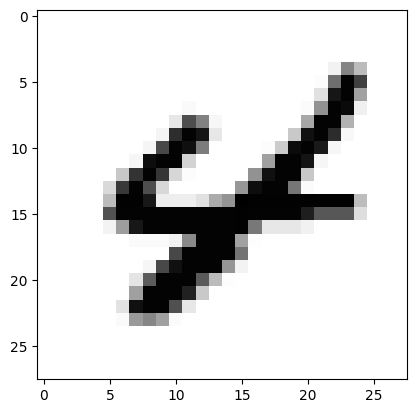

In [16]:
image_index = 0
print(y[image_index])
plt.imshow(X[image_index].reshape(28, 28), cmap = 'Greys')
plt.show()

2


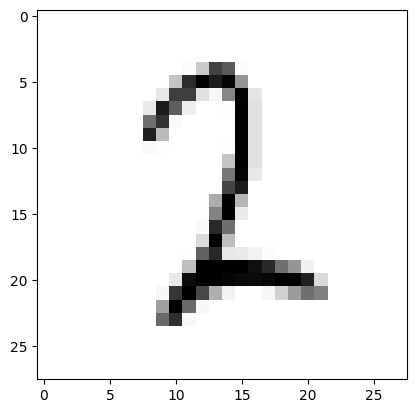

In [17]:
image_index = 10
print(y[image_index])
plt.imshow(X[image_index].reshape(28, 28), cmap = 'Greys')
plt.show()

7


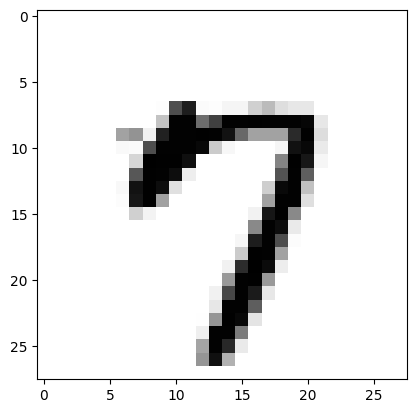

In [18]:
image_index = 100
print(y[image_index])
plt.imshow(X[image_index].reshape(28, 28), cmap = 'Greys')
plt.show()

# Train Test Split

In [21]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 40, stratify = np.array(y))

# Normalization

In [22]:
x_train /= 255
x_test /= 255

# Model Creation

In [23]:
input_shape = (28, 28, 1)
output_class = 10

In [26]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, MaxPooling2D, Flatten

# define a model
model = Sequential()
model.add(Conv2D(28, kernel_size = (3,3), input_shape = input_shape))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(128, activation = tf.nn.relu))
model.add(Dropout(0.3))
model.add(Dense(output_class, activation = tf.nn.softmax))

model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = 'accuracy')

In [27]:
# train the model
model.fit(x_train, y_train, batch_size = 32, epochs = 30, validation_data = (x_test, y_test))

Epoch 1/30
1225/1225 [==============================] - 17s 5ms/step - loss: 0.2695 - accuracy: 0.9190 - val_loss: 0.1143 - val_accuracy: 0.9640
Epoch 2/30
1225/1225 [==============================] - 5s 4ms/step - loss: 0.1143 - accuracy: 0.9656 - val_loss: 0.0783 - val_accuracy: 0.9757
Epoch 3/30
1225/1225 [==============================] - 5s 4ms/step - loss: 0.0802 - accuracy: 0.9753 - val_loss: 0.0781 - val_accuracy: 0.9764
Epoch 4/30
1225/1225 [==============================] - 5s 4ms/step - loss: 0.0655 - accuracy: 0.9789 - val_loss: 0.0728 - val_accuracy: 0.9787
Epoch 5/30
1225/1225 [==============================] - 4s 4ms/step - loss: 0.0532 - accuracy: 0.9831 - val_loss: 0.0687 - val_accuracy: 0.9803
Epoch 6/30
1225/1225 [==============================] - 5s 4ms/step - loss: 0.0448 - accuracy: 0.9842 - val_loss: 0.0657 - val_accuracy: 0.9823
Epoch 7/30
1225/1225 [==============================] - 5s 4ms/step - loss: 0.0374 - accuracy: 0.9870 - val_loss: 0.0693 - val_accuracy

# Testing the model

1/1 [==============================] - 0s 17ms/step
Predicted Output:  9


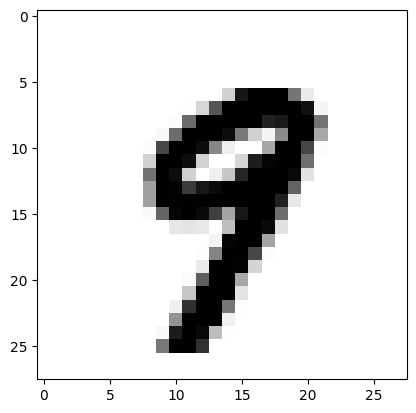

In [29]:
image_index = 102
plt.imshow(x_test[image_index].reshape(28,28), cmap = 'Greys')
pred = model.predict(x_test[image_index].reshape(1,28,28,1))
print('Predicted Output: ', pred.argmax())
plt.show()

1/1 [==============================] - 0s 19ms/step
Predicted Output:  1


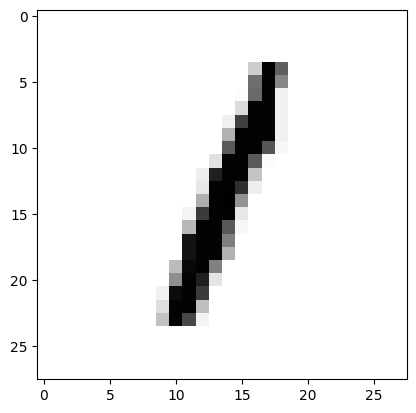

In [30]:
image_index = 98
plt.imshow(x_test[image_index].reshape(28,28), cmap = 'Greys')
pred = model.predict(x_test[image_index].reshape(1,28,28,1))
print('Predicted Output: ', pred.argmax())
plt.show()